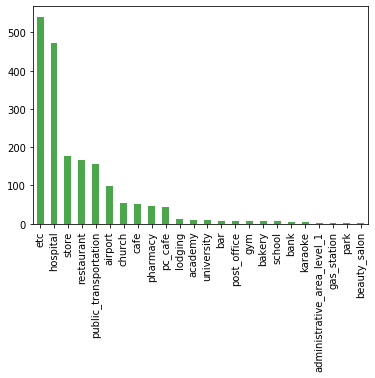

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import warnings
warnings.filterwarnings("ignore")

# 20대가 주로 다는 장소 
     
time_age = pd.read_csv(r'./data/PatientInfo.csv')
patient_route = pd.read_csv(r'./data/PatientRoute.csv')

joined_df = time_age.merge(patient_route, left_on = 'patient_id', right_on = 'patient_id', how = 'inner')
# print(joined_df)
joined_df = joined_df[joined_df.age.notnull()]
joined_df = joined_df[joined_df.age=='20s']
# print(joined_df.type.value_counts())

value = joined_df.type.value_counts()   
value = value.sort_values(ascending=False)
value.plot.bar(color='green', alpha = 0.7)

plt.show()


False    1098
True      800
Name: is_many, dtype: int64

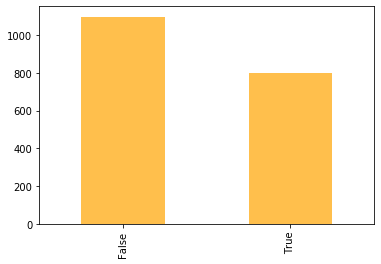

In [120]:
# 20대가 주로 다니는 장소 중 여러 사람이 이용하는 다중 이용시설의 비율을 알아본다.
many_people_place = ['hospital','public_transportation', 'airport', 'church', 'university','school','park']
len(many_people_place)

def ismany(x):
    if x in many_people_place:
        res = True
    else : 
        res = False
    return res

joined_df['is_many'] = joined_df['type'].apply(lambda x: ismany(x))
joined_df = joined_df[['patient_id', 'type', 'is_many']]

joined_df.is_many.value_counts().plot.bar(color='orange', alpha = 0.7)

joined_df.is_many.value_counts()
# etc가 500임을 감안하여 이는 정확하지 않다. 그러므로 더 이상의 분석을 하지 않는다.
# 다중 이용 시설을 많이 사용하는지 아닌지 확실 하지 않기 때문이다.

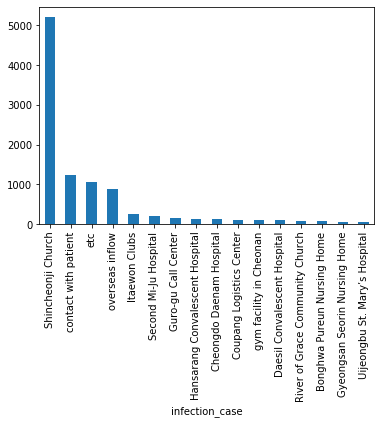

In [223]:
# 20대가 주요한 집단 감염에 많이 연루되어서 감염자가 많은가?
# 주요한 집단 감염을 50명 이상의 사람이 감염된 사건이라 하자.

case = pd.read_csv(r'./data/Case.csv')
all_case = case.groupby(['infection_case'])['confirmed'].sum()
all_case.sort_values(ascending = False, inplace=True)
all_case = all_case[all_case > 50]
all_case.plot.bar()
plt.show()

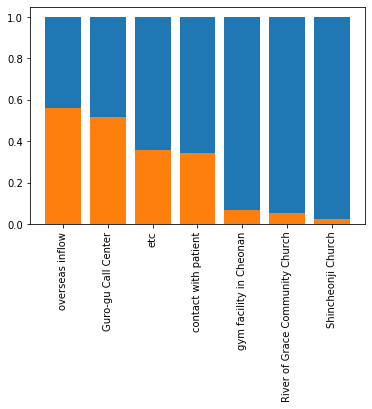

In [245]:
big_case_20 = joined_df[joined_df.age.notnull()]
big_case_20 = joined_df[big_case_20.age == '20s']
# big_case_20.nunique()
big_case_20 = big_case_20.infection_case.value_counts()

big_case_percent = {}

for event in all_case.index:
    if event in big_case_20.index:
        big_case_percent[event] = np.divide(big_case_20[event],all_case[event]).round(5)

test_df = pd.DataFrame.from_dict(big_case_percent, orient='index')
test_df.columns = ['percentage_of_20s']
test_df.sort_values(by = ['percentage_of_20s'], inplace = True, ascending = False)

test_df['percent100'] = 1

plt.bar(test_df.index, test_df.percent100)
plt.bar(test_df.index,test_df.percentage_of_20s)
plt.xticks(rotation = 90 )
plt.show()